In [1]:
import tensorflow as tf

In [2]:
train_dir='C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\train_data'
test_dir='C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\test_data'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagenerator = ImageDataGenerator(
    horizontal_flip=True  
)

In [5]:
val_datagenerator = ImageDataGenerator()

In [6]:
test_datagenerator = ImageDataGenerator()

In [7]:
train_generator = train_datagenerator.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 18169 images belonging to 3 classes.


In [8]:
print(train_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [10]:
val_generator = val_datagenerator.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 909 images belonging to 3 classes.


In [11]:
print(val_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [12]:
test_generator = test_datagenerator.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 909 images belonging to 3 classes.


In [13]:
print(test_generator.class_indices)

{'blouse': 0, 'hoodie': 1, 't_shirt': 2}


In [18]:
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)


#summary
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_1[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [19]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1024)              1529968   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 1,533,043
Trainable params: 1,520,931
Non-trainable params: 12,112
_________________________________________________________________


In [21]:
'''
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=30
          )
'''
print("_____________________")

_____________________


In [22]:
'''
test_loss, test_acc = model.evaluate(test_generator)
'''
print("__________________")

__________________


In [25]:
class printLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_decayed_lr = self.model.optimizer._decayed_lr(tf.float32).numpy()
        print("current decayed lr: {:0.7f}".format(current_decayed_lr))

from tensorflow.keras.callbacks import ModelCheckpoint

initial_learning_rate = 1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                                                initial_learning_rate,
                                                decay_steps = 100,
                                                decay_rate = 0.96,
                                                staircase = False)

ckpt_modelpath = "./full_aug.h5"

checkpointer = ModelCheckpoint(
    filepath=ckpt_modelpath,
    monitor='val_acc',
    verbose=2,
    save_best_only=True)

model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
             metrics =['acc'])

history = model.fit(train_generator, 
                   steps_per_epoch = len(train_generator),
                   epochs = 100,
                   validation_data = val_generator,
                   validation_steps = len(val_generator),
                   callbacks = [printLR(), checkpointer])

Epoch 1/250
568/568 [==============================] - 72s 120ms/step - loss: 0.4633 - acc: 0.8240 - val_loss: 3.7031 - val_acc: 0.5886
current decayed lr: 0.0007930

Epoch 00001: val_acc improved from -inf to 0.58856, saving model to .\name_of_model.h5
Epoch 2/250
568/568 [==============================] - 67s 118ms/step - loss: 0.1438 - acc: 0.9465 - val_loss: 2.4297 - val_acc: 0.6359
current decayed lr: 0.0006289

Epoch 00002: val_acc improved from 0.58856 to 0.63586, saving model to .\name_of_model.h5
Epoch 3/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0764 - acc: 0.9712 - val_loss: 2.3286 - val_acc: 0.6238
current decayed lr: 0.0004988

Epoch 00003: val_acc did not improve from 0.63586
Epoch 4/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0550 - acc: 0.9796 - val_loss: 1.8546 - val_acc: 0.6876
current decayed lr: 0.0003956

Epoch 00004: val_acc improved from 0.63586 to 0.68757, saving model to .\name_of_model.h5
Epoch 5/250
568

568/568 [==============================] - 67s 118ms/step - loss: 0.0022 - acc: 0.9988 - val_loss: 2.7964 - val_acc: 0.6909
current decayed lr: 0.0000001

Epoch 00038: val_acc did not improve from 0.71067
Epoch 39/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0019 - acc: 0.9990 - val_loss: 2.7968 - val_acc: 0.6920
current decayed lr: 0.0000001

Epoch 00039: val_acc did not improve from 0.71067
Epoch 40/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0025 - acc: 0.9984 - val_loss: 2.7919 - val_acc: 0.6920
current decayed lr: 0.0000001

Epoch 00040: val_acc did not improve from 0.71067
Epoch 41/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0021 - acc: 0.9989 - val_loss: 2.7915 - val_acc: 0.6909
current decayed lr: 0.0000001

Epoch 00041: val_acc did not improve from 0.71067
Epoch 42/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0022 - acc: 0.9990 - val_loss: 2.7932 - val_acc: 0.6920
curr

568/568 [==============================] - 67s 118ms/step - loss: 0.0016 - acc: 0.9993 - val_loss: 2.7894 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00076: val_acc did not improve from 0.71067
Epoch 77/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0018 - acc: 0.9989 - val_loss: 2.7899 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00077: val_acc did not improve from 0.71067
Epoch 78/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0022 - acc: 0.9985 - val_loss: 2.7888 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00078: val_acc did not improve from 0.71067
Epoch 79/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0025 - acc: 0.9984 - val_loss: 2.7897 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00079: val_acc did not improve from 0.71067
Epoch 80/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0024 - acc: 0.9985 - val_loss: 2.7874 - val_acc: 0.6920
curr

current decayed lr: 0.0000000

Epoch 00113: val_acc did not improve from 0.71067
Epoch 114/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0013 - acc: 0.9995 - val_loss: 2.7897 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00114: val_acc did not improve from 0.71067
Epoch 115/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0021 - acc: 0.9989 - val_loss: 2.7846 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00115: val_acc did not improve from 0.71067
Epoch 116/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0017 - acc: 0.9991 - val_loss: 2.7901 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00116: val_acc did not improve from 0.71067
Epoch 117/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0019 - acc: 0.9990 - val_loss: 2.7908 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00117: val_acc did not improve from 0.71067
Epoch 118/250
568/568 [====================

568/568 [==============================] - 67s 118ms/step - loss: 0.0017 - acc: 0.9992 - val_loss: 2.7908 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00151: val_acc did not improve from 0.71067
Epoch 152/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0020 - acc: 0.9986 - val_loss: 2.7913 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00152: val_acc did not improve from 0.71067
Epoch 153/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0021 - acc: 0.9991 - val_loss: 2.7898 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00153: val_acc did not improve from 0.71067
Epoch 154/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0020 - acc: 0.9989 - val_loss: 2.7919 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00154: val_acc did not improve from 0.71067
Epoch 155/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0026 - acc: 0.9989 - val_loss: 2.7917 - val_acc: 0.6920


current decayed lr: 0.0000000

Epoch 00188: val_acc did not improve from 0.71067
Epoch 189/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0020 - acc: 0.9991 - val_loss: 2.7943 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00189: val_acc did not improve from 0.71067
Epoch 190/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0022 - acc: 0.9987 - val_loss: 2.7911 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00190: val_acc did not improve from 0.71067
Epoch 191/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0028 - acc: 0.9985 - val_loss: 2.7923 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00191: val_acc did not improve from 0.71067
Epoch 192/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0020 - acc: 0.9991 - val_loss: 2.7936 - val_acc: 0.6909
current decayed lr: 0.0000000

Epoch 00192: val_acc did not improve from 0.71067
Epoch 193/250
568/568 [====================

568/568 [==============================] - 67s 118ms/step - loss: 0.0015 - acc: 0.9992 - val_loss: 2.7954 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00226: val_acc did not improve from 0.71067
Epoch 227/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0018 - acc: 0.9988 - val_loss: 2.7915 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00227: val_acc did not improve from 0.71067
Epoch 228/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0021 - acc: 0.9987 - val_loss: 2.7918 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00228: val_acc did not improve from 0.71067
Epoch 229/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0016 - acc: 0.9991 - val_loss: 2.7931 - val_acc: 0.6920
current decayed lr: 0.0000000

Epoch 00229: val_acc did not improve from 0.71067
Epoch 230/250
568/568 [==============================] - 67s 118ms/step - loss: 0.0022 - acc: 0.9988 - val_loss: 2.7877 - val_acc: 0.6931


In [34]:
model.layers[0].summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_1[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [35]:
loaded_model = tf.keras.models.load_model('C:\\Users\\SDH-LAB\\Desktop\\SMARCLE_MAKERS_DAY\\acc_07099.h5')


Confusion Matrix
[[103 167  38]
 [112 155  34]
 [105 149  46]]


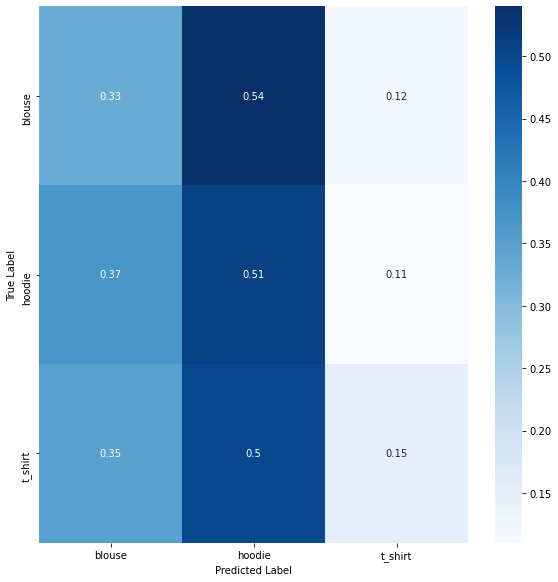

In [31]:
# confusion matrix
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, top_k_accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = test_generator.class_indices.keys()
print('Confusion Matrix')
con_mat = confusion_matrix(test_generator.classes, y_pred)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
print(con_mat)

con_mat_df = pd.DataFrame(con_mat_norm,
                         index = target_names,
                         columns = target_names)
figure = plt.figure(figsize = (8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel('Predicted Label')
plt.show()

Confusion Matrix
[[106 168  34]
 [114 150  37]
 [100 153  47]]


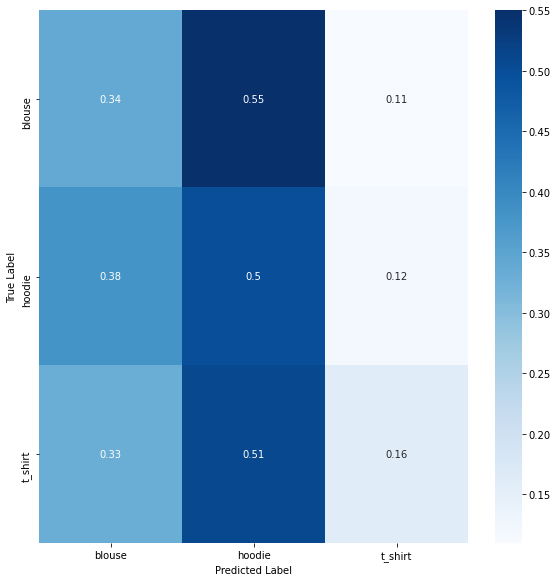

In [36]:
#loaded_model -> confusion matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = test_generator.class_indices.keys()
print('Confusion Matrix')
con_mat = confusion_matrix(test_generator.classes, y_pred)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
print(con_mat)

con_mat_df = pd.DataFrame(con_mat_norm,
                         index = target_names,
                         columns = target_names)
figure = plt.figure(figsize = (8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel('Predicted Label')
plt.show()

In [32]:
# acc, f1-score . etc
print("Classification Report")
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      blouse       0.32      0.33      0.33       308
      hoodie       0.33      0.51      0.40       301
     t_shirt       0.39      0.15      0.22       300

    accuracy                           0.33       909
   macro avg       0.35      0.33      0.32       909
weighted avg       0.35      0.33      0.32       909



In [ ]:
        self.text_label = QLabel(self)
        self.text_label.move(150, 350)
        self.text_label.setText('Check it out!')


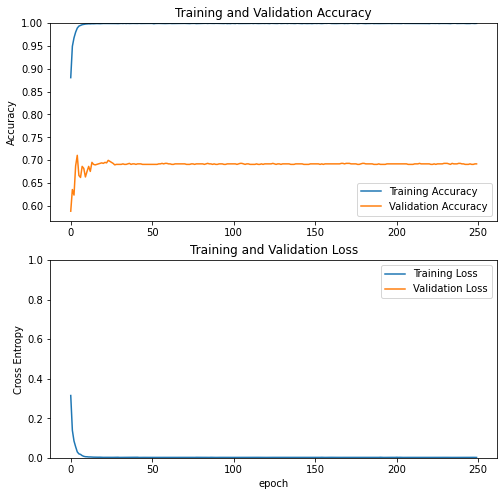

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()